In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import random

In [2]:
# read the data
import json
import json
domain1 = []
with open('../data/domain1_train.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            domain1.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
domain2 = []
with open('../data/domain2_train.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            domain2.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")


all_domain = domain1 + domain2

In [3]:
old_text = []
labels = []
for i in range(len(all_domain)):
    old_text.append(all_domain[i]['text'])
    labels.append(all_domain[i]['label'])

data = old_text
#use bow as baseline approach
unique_integers = set()
for integer_list in data:
    unique_integers.update(integer_list)

vocabulary = sorted(list(unique_integers))

print(len(vocabulary))

bow_data = []
for integer_list in data:
    bow_vector = [integer_list.count(word) for word in vocabulary]
    bow_data.append(bow_vector)

X = bow_data 
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

5000


In [5]:
from sklearn.neural_network import MLPClassifier

# Create and train MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(256, 256, 128, 64), max_iter=200, early_stopping=True, random_state=0, learning_rate='adaptive')
MLP.fit(X_train, y_train)

# Make predictions
MLP_pred = MLP.predict(X_test)

# Calculate accuracy and F1 score
MLP_Accuracy = accuracy_score(y_test, MLP_pred)
MLP_F1_Score = f1_score(y_test, MLP_pred, average='weighted')

print("MLP Accuracy: {}".format(MLP_Accuracy))
print("MLP F1 Score: {}".format(MLP_F1_Score))

MLP Accuracy: 0.9031976744186047
MLP F1 Score: 0.9015488466716863


In [3]:
# testing on the test dataset
test = []
with open('../data/test_set.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            test.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
# taking all the data out to get the predictions

X_train_final = []
for i in range(len(test)):
    X_train_final.append(test[i]['text'])

In [8]:
# transfer the data into bow formatting
# The number of features in data (4538) is not the same as it was in training data (5000).
# You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.
# data = old_text
data = old_text
unique_integers = set()

for integer_list in data:
    unique_integers.update(integer_list)


vocabulary = sorted(list(unique_integers))

bow_data_final = []
for integer_list in X_train_final: 
    bow_vector = [integer_list.count(word) for word in vocabulary]
    bow_data_final.append(bow_vector)

In [41]:
prediction = MLP.predict(bow_data_final)
print(len(prediction))

id = []
for i in range(0,1000):
    id.append(i)

answer = []
for i in range(0,1000):
    answer.append((id[i],prediction[i]))

import csv



file_name = 'output.csv'
column_name = ['id','class']


with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_name)

    for row in answer:
        writer.writerow(row)


print(f'Data has been written to {file_name}')

1000
Data has been written to output.csv


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
# Define the input layer
input_layer = Input(shape=(5000,))  

# Add an embedding layer to convert token indices to dense vectors
embedding_layer = Embedding(input_dim=5000, output_dim=128)(input_layer)

# Flatten the embedded sequences
flatten_layer = Flatten()(embedding_layer)

# Create the MLP layers
dense_layer_1 = Dense(128, activation='relu')(flatten_layer)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)

dropout_layer_1 = Dropout(0.5)(dense_layer_1)
dropout_layer_2 = Dropout(0.5)(dense_layer_2)

# Output layer with appropriate activation function and units
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)  # Use sigmoid for binary classification

# Create the model
MLP = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an appropriate loss function
MLP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ensure you have balanced classes or use class weights
# If your data is imbalanced, calculate class weights
class_weights = {0: 1.0, 1: 1.0}  # You may need to adjust these values

# Train the MLP model with class weights
mlp_model = MLP.fit(X_train, y_train, epochs=5, batch_size=32, 
          validation_data=(X_test, y_test), class_weight=class_weights)



Epoch 1/5
860/860 [==============================] - 409s 475ms/step - loss: 0.3830 - accuracy: 0.8604 - val_loss: 0.2698 - val_accuracy: 0.9016
Epoch 2/5
860/860 [==============================] - 444s 517ms/step - loss: 0.2241 - accuracy: 0.9145 - val_loss: 0.2803 - val_accuracy: 0.8984
Epoch 3/5
860/860 [==============================] - 436s 508ms/step - loss: 0.1537 - accuracy: 0.9422 - val_loss: 0.3188 - val_accuracy: 0.8858
Epoch 4/5
860/860 [==============================] - 413s 480ms/step - loss: 0.1261 - accuracy: 0.9528 - val_loss: 0.3715 - val_accuracy: 0.8875
Epoch 5/5
860/860 [==============================] - 403s 469ms/step - loss: 0.0570 - accuracy: 0.9793 - val_loss: 0.6608 - val_accuracy: 0.8874


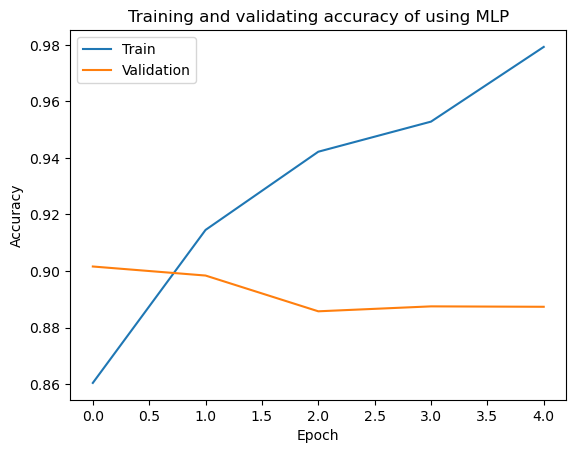

In [12]:
plt.plot(mlp_model.history['accuracy'], label='Train')
plt.plot(mlp_model.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy of using MLP')
plt.legend()
plt.show()

In [26]:
prediction = MLP.predict(Test)
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['class'] = prediction
submission = submission.astype({'class':'int'})

print(submission)
submission.to_csv('submission.csv', header = True, index=False)

      id  class
0      0      0
1      1      0
2      2      0
3      3      0
4      4      0
..   ...    ...
995  995      0
996  996      0
997  997      0
998  998      0
999  999      0

[1000 rows x 2 columns]


In [8]:
'''import tensorflow as tf
import keras
from keras import layers
import random
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))'''



"import tensorflow as tf\nimport keras\nfrom keras import layers\nimport random\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(10000, 64, mask_zero=True),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),\n    tf.keras.layers.Dense(64, activation='relu'),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel.compile(loss='binary_crossentropy',\n              optimizer=tf.keras.optimizers.Adam(1e-4),\n              metrics=['accuracy'])\n\nhistory = model.fit(X_train, y_train, epochs=5,\n                    validation_data=(X_test, y_test))"

In [13]:
'''import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Adjust input_dim and output_dim as needed
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))  # Example for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = {0: 1.0, 1: 1.0}
# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), class_weight=class_weights)'''

Epoch 1/5
860/860 [==============================] - 20s 23ms/step - loss: 0.4773 - accuracy: 0.7804 - val_loss: 0.3417 - val_accuracy: 0.8853
Epoch 2/5
860/860 [==============================] - 19s 22ms/step - loss: 0.3157 - accuracy: 0.8952 - val_loss: 0.3120 - val_accuracy: 0.8955
Epoch 3/5
860/860 [==============================] - 19s 22ms/step - loss: 0.2788 - accuracy: 0.9098 - val_loss: 0.2933 - val_accuracy: 0.9041
Epoch 4/5
860/860 [==============================] - 19s 22ms/step - loss: 0.2508 - accuracy: 0.9185 - val_loss: 0.2964 - val_accuracy: 0.9006
Epoch 5/5
860/860 [==============================] - 19s 22ms/step - loss: 0.2142 - accuracy: 0.9284 - val_loss: 0.3135 - val_accuracy: 0.8938


In [14]:
'''prediction = model.predict(Test)
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['class'] = prediction
submission = submission.astype({'class':'int'})

print(submission)
submission.to_csv('submission.csv', header = True, index=False)'''

      id  class
0      0      0
1      1      0
2      2      0
3      3      0
4      4      0
..   ...    ...
995  995      0
996  996      0
997  997      0
998  998      0
999  999      0

[1000 rows x 2 columns]


In [6]:
# read the data
import json
domain1 = []
with open('../data/domain1_train.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            domain1.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
domain2 = []
with open('../data/domain2_train.json', 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            domain2.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
all_domain = domain1 + domain2


old_text = []
labels = []
for i in range(len(all_domain)):
    old_text.append(all_domain[i]['text'])
    labels.append(all_domain[i]['label'])


# 将token用bow表示
# 这个的问题就是feature维度太大了
data = old_text
# 假设你有一个包含不同长度整数列表的数据集 data
unique_integers = set()
for integer_list in data:
    unique_integers.update(integer_list)

# 将整数列表转化为一个有序列表
vocabulary = sorted(list(unique_integers))
print(len(vocabulary))

# 构建 BOW 表示
bow_data = []
for integer_list in data:
    bow_vector = [integer_list.count(word) for word in vocabulary]
    bow_data.append(bow_vector)

5000


KeyboardInterrupt: 